# Setup

In [17]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

### Keras

In [2]:
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Reshape, Dense
from keras.activations import relu

### additional

In [3]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

# Data loading

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

## Visualization

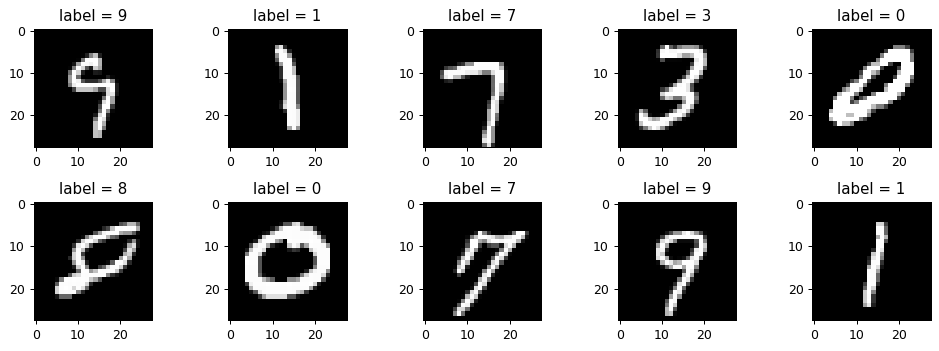

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 4), dpi=90)
indxs = np.random.randint(0, X_train.shape[0], 10)

for i in range(2):
    for j in range(5) :
        axes[i, j].imshow(X_train[indxs[i*5 + j]], cmap='gray')
        axes[i, j].set_title(f'label = {y_train[indxs[i*5 + j]]}')

fig.tight_layout()
plt.show()

# Distribution

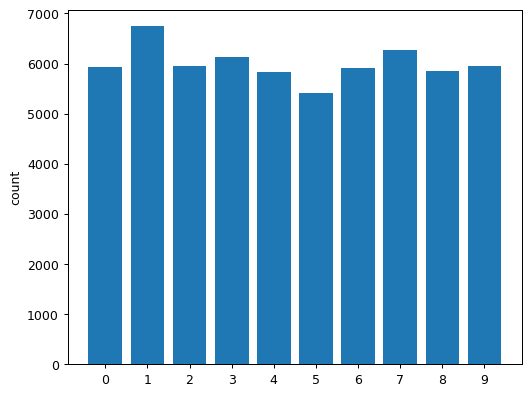

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.hist(y_train, bins=np.arange(-0.5, 10, 1), rwidth=0.8)
ax.set_xticks(range(10))
ax.set_ylabel('count')
fig.tight_layout()
plt.show()

# Normalization

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model

In [9]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(500, activation = relu),
    Dense(100, activation = relu),
    Dense(30, activation = relu)
])

decoder = Sequential([
    Dense(100, activation = relu, input_shape=(30,)),
    Dense(500, activation = relu),
    Dense(28*28, activation='sigmoid'),
    Reshape((28, 28))
])

input_layer = Input(shape=(28, 28))
autoencoder = Model(
    input_layer,
    decoder(encoder(input_layer))
)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder.compile()
decoder.compile()

hist = autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 53s 26ms/step - loss: 0.1281 - val_loss: 0.0966
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0934 - val_loss: 0.0894
Epoch 3/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0879 - val_loss: 0.0863
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0853 - val_loss: 0.0836
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0835 - val_loss: 0.0824
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0823 - val_loss: 0.0821
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0814 - val_loss: 0.0814
Epoch 8/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0807 - val_loss: 0.0807
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0801 - val_loss: 0.0800
Epoch 10/10
1875/1875 [==============================] - 42s 22m

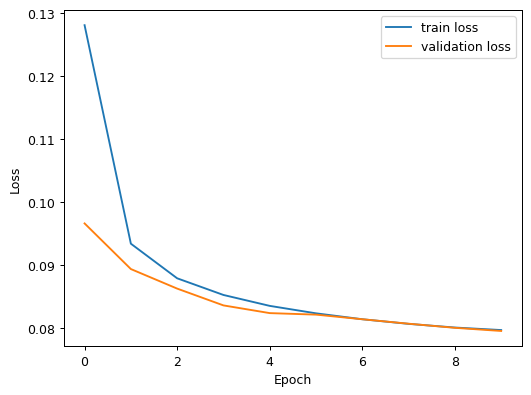

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.plot(hist.history['loss'], label='train loss')
ax.plot(hist.history['val_loss'], label = 'validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
fig.tight_layout()
plt.show()

# Latent-space representation

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), dpi=90)
indxs = np.random.randint(0, X_test.shape[0], 5)
test_inputs = tf.convert_to_tensor(X_test[indxs])
test_outputs = decoder.predict(encoder.predict(test_inputs))

for i in range(5):
    axes[0, i].imshow(test_outputs[i], cmap='gray')
    axes[0, i].get_xaxis().set_ticks([])
    axes[0, i].get_yaxis().set_ticks([])

    axes[1, i].imshow(test_inputs[i], cmap='gray')
    axes[1, i].get_xaxis().set_ticks([])
    axes[1, i].get_yaxis().set_ticks([])

axes[0, 0].set_ylabel('AutoEncoder')
axes[1, 0].set_ylabel('Original')

fig.tight_layout()
plt.show()

# Classifier

In [12]:
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [13]:
classifier = Sequential([
    Dense(24, activation = relu, input_shape=(30,)),
    Dense(16, activation = relu),
    Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = classifier.fit(latent_train, y_train, epochs=10, validation_data=(latent_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8660 - accuracy: 0.7185 - val_loss: 0.4271 - val_accuracy: 0.8660
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3844 - accuracy: 0.8776 - val_loss: 0.3269 - val_accuracy: 0.8983
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.8998 - val_loss: 0.2800 - val_accuracy: 0.9161
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.9121 - val_loss: 0.2635 - val_accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2538 - accuracy: 0.9201 - val_loss: 0.2289 - val_accuracy: 0.9302
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2327 - accuracy: 0.9273 - val_loss: 0.2037 - val_accuracy: 0.9390
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2135 - accuracy: 0.9324 - val_loss: 0.1980 - val_accuracy

# Metrics

## Loss

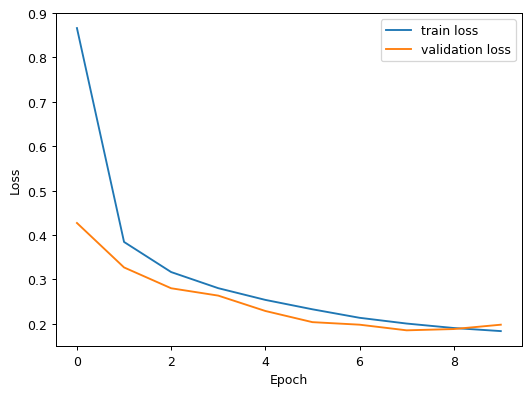

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.plot(hist.history['loss'], label='train loss')
ax.plot(hist.history['val_loss'], label = 'validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
fig.tight_layout()
plt.show()

## Accuracy

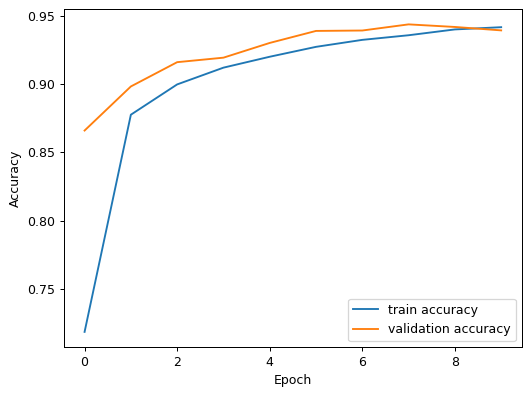

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.plot(hist.history['accuracy'], label='train accuracy')
ax.plot(hist.history['val_accuracy'], label = 'validation accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
fig.tight_layout()
plt.show()

## confusion_matrix

313/313 [==============================] - 2s 7ms/step


<Axes: >

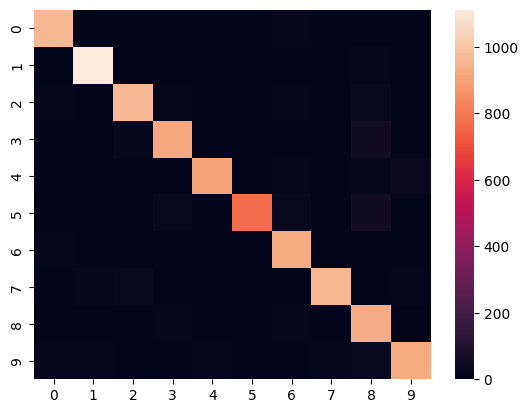

In [22]:
sn.heatmap(confusion_matrix(y_test, np.argmax(classifier.predict(encoder.predict(X_test)), axis=1)))